$y$: the class label, $x^{'}$: paraphrase of the input x, define reward $R(x^{'}) = \log P_{lm} (y | x^{'})$

$P(y | x) = \sum_{x^{'}} P(y, x^{'} | x) = \sum_{x^{'}} P_{\theta} (x^{'} | x) \times P_{lm} (y | x^{'})$

Policy Gradient (PG): $\sum_{x^{'} \in P_{\theta}} \log P_{\theta} (x^{'} | x) \times R(x^{'})$

MML: $\log \sum_{x^{'} \in P_{\theta}} P_{\theta} (x^{'} | x) \times \exp(R(x^{'}))$

We know that $MML \ge PG$


Policy Gradient with subtracting the reward of the original sentence + reward normalization:

Define reward of original input $R(x) = \log P_{lm} (y | x)$.

Define $Mean_{x}(R(x^{'}) - R(x)) = \frac{1}{\#x^{'}} \sum_{x^{'} \in P_{\theta}} R(x^{'}) - R(x)$.

$SD_{x}(R(x^{'}) - R(x)) = \sqrt{\frac{1}{\#x^{'}} \sum_{x^{'} \in P_{\theta}} \{R(x^{'}) - R(x) - Mean_{x}(R(x^{'}) - R(x))\}^2}$

Normalized Reward $NR(x^{'}) = \frac{(R(x^{'}) - R(x)) - Mean_{x}(R(x^{'}) - R(x))}{SD_{x}(R(x^{'}) - R(x))} = \frac{R(x^{'}) - Mean_x(R(x^{'}))}{SD_{x}(R(x^{'}))}$.

PG (z-score) = $\sum_{x^{'} \in P_{\theta}} \log P_{\theta} (x^{'} | x) \times NR(x^{'})$

# Consider adding the semantic similarity score given x' and x. (search semantic similarity scores! or the technique based on average embeddings.)
# Consider a reward promoting diversity between x' and x. negative rouge!
# Apply reward-normalization on each reward saparately.
# How we can mix reward normalization and self-critical training? (Should be better than beam-search samples.)
# Mix top-p sampling with Gumble-Softmax? (Do we need to?)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# this is policy gradient with the normal log probability score.
# this must be input.
# input.

pg_files = [
    "results/policy-gradient-vs-mml/sst2/pg/input_finetune_11_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg/input_finetune_42_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg/input_finetune_1993_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg/input_finetune_2023_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg/input_finetune_12321_0.00001_0_1.csv",
]

pg_steps = []
pg_performances = []
for file in pg_files:
    df = pd.read_csv(file)
    step_arr = df["Step"].tolist()
    performance_arr = df["Value"].tolist()
    pg_steps.append(step_arr)
    pg_performances.append(performance_arr)

# this is mml gradient with the normal log probability score.
# this can be all_finetune.
mml_files = [
    "results/policy-gradient-vs-mml/sst2/mml/all_finetune_11_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/mml/all_finetune_42_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/mml/all_finetune_1993_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/mml/all_finetune_2023_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/mml/all_finetune_12321_0.00001_0_1.csv",
]

mml_steps = []
mml_performances = []
for file in mml_files:
    df = pd.read_csv(file)
    step_arr = df["Step"].tolist()
    performance_arr = df["Value"].tolist()
    mml_steps.append(step_arr)
    mml_performances.append(performance_arr)

# this is mml gradient with the z-score
# this can be all_finetune.
mml_z_score_files = [
    "results/policy-gradient-vs-mml/sst2/mml-reshaping/11_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/mml-reshaping/42_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/mml-reshaping/1993_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/mml-reshaping/2023_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/mml-reshaping/12321_0.00001_0_1.csv",
]

mml_z_score_steps = []
mml_z_score_performances = []
for file in mml_z_score_files:
    df = pd.read_csv(file)
    step_arr = df["Step"].tolist()
    performance_arr = df["Value"].tolist()
    mml_z_score_steps.append(step_arr)
    mml_z_score_performances.append(performance_arr)

# this is policy gradient + z-score over the reward difference.
pg_z_score_files = [
    "results/policy-gradient-vs-mml/sst2/pg-reward-reshaping/output_finetune_11_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg-reward-reshaping/output_finetune_42_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg-reward-reshaping/output_finetune_1993_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg-reward-reshaping/output_finetune_2023_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg-reward-reshaping/output_finetune_12321_0.00001_0_1.csv",
]

pg_z_score_steps = []
pg_z_score_performances = []
for file in pg_z_score_files:
    df = pd.read_csv(file)
    step_arr = df["Step"].tolist()
    performance_arr = df["Value"].tolist()
    pg_z_score_steps.append(step_arr)
    pg_z_score_performances.append(performance_arr)


# this is policy gradient + reward_difference.
pg_reward_delta_files = [
    "results/policy-gradient-vs-mml/sst2/pg-reward-difference/input_finetune_11_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg-reward-difference/input_finetune_42_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg-reward-difference/input_finetune_1993_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg-reward-difference/input_finetune_2023_0.00001_0_1.csv",
    "results/policy-gradient-vs-mml/sst2/pg-reward-difference/input_finetune_12321_0.00001_0_1.csv",
]

pg_reward_delta_steps = []
pg_reward_delta_performances = []
for file in pg_reward_delta_files:
    df = pd.read_csv(file)
    step_arr = df["Step"].tolist()
    performance_arr = df["Value"].tolist()
    pg_reward_delta_steps.append(step_arr)
    pg_reward_delta_performances.append(performance_arr)

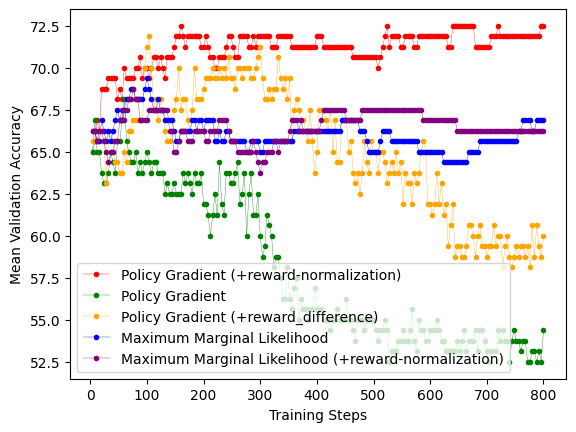

In [ ]:
fig = plt.figure()

x = np.array(mml_steps[0])
mml_y = np.array(mml_performances) * 100.00
mml_z_score_y = np.array(mml_z_score_performances) * 100.00
pg_y = np.array(pg_performances) * 100.00
pg_z_score_y = np.array(pg_z_score_performances) * 100.00
pg_reward_delta_y = np.array(pg_reward_delta_performances) * 100.00

mean_mml_y = np.mean(mml_y, axis=0)
std_mml_y = np.std(mml_y, axis=0)

mean_mml_z_score_y = np.mean(mml_z_score_y, axis=0)
std_mml_z_score_y = np.std(mml_z_score_y, axis=0)

mean_pg_y = np.mean(pg_y, axis=0)
std_pg_y = np.std(pg_y, axis=0)

mean_pg_z_score_y = np.mean(pg_z_score_y, axis=0)
std_pg_z_score_y = np.std(pg_z_score_y, axis=0)

mean_pg_reward_delta_y = np.mean(pg_reward_delta_y, axis=0)
std_pg_reward_delta_y = np.std(pg_reward_delta_y, axis=0)

plt.plot(
    x, mean_pg_z_score_y, color="red", marker=".", linewidth=0.25, label="Policy Gradient (+reward-normalization)"
)
plt.plot(x, mean_pg_y, color="green", marker=".", linewidth=0.25, label="Policy Gradient")
plt.plot(
    x, mean_pg_reward_delta_y, color="orange", marker=".", linewidth=0.25, label="Policy Gradient (+reward_difference)"
)
plt.plot(x, mean_mml_y, color="blue", marker=".", linewidth=0.25, label="Maximum Marginal Likelihood")
plt.plot(
    x,
    mean_mml_z_score_y,
    color="purple",
    marker=".",
    linewidth=0.25,
    label="Maximum Marginal Likelihood (+reward-normalization)",
)

plt.legend()
plt.xlabel("Training Steps")
plt.ylabel("Mean Validation Accuracy")

plt.show()